# Yogurt
from the kaggle R data set dump....... Yogurt!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
Yogurt = pd.read_csv("./.kaggle_data/Rdatasets/Yogurt.csv").drop("Unnamed: 0",axis=1)
Yogurt.shape

(2412, 10)

In [3]:
Yogurt.head(n=10)

,id,feat.yoplait,feat.dannon,feat.hiland,feat.weight,price.yoplait,price.dannon,price.hiland,price.weight,choice
0,1,0,0,0,0,10.8,8.1,6.1,7.9,weight
1,1,0,0,0,0,10.8,9.8,6.4,7.5,dannon
2,1,0,0,0,0,10.8,9.8,6.1,8.6,dannon
3,1,0,0,0,0,10.8,9.8,6.1,8.6,dannon
4,1,0,0,0,0,12.5,9.8,4.9,7.9,dannon
5,1,0,0,0,0,10.8,9.2,5.0,7.9,dannon
6,1,0,0,0,0,10.3,8.1,4.9,7.9,dannon
7,1,0,0,0,0,10.8,8.6,5.4,7.9,weight
8,2,0,0,0,0,10.8,9.8,5.0,7.9,yoplait
9,2,0,0,0,0,10.8,9.8,5.0,7.9,yoplait


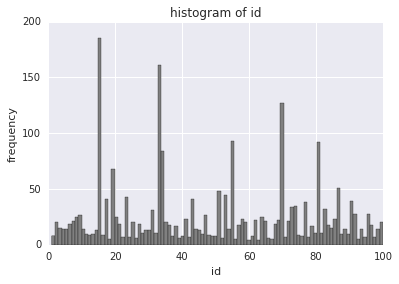

In [4]:
plt.hist(Yogurt["id"],bins=100,color='grey')
plt.title("histogram of id")
plt.xlabel("id")
plt.ylabel("frequency")
plt.show()

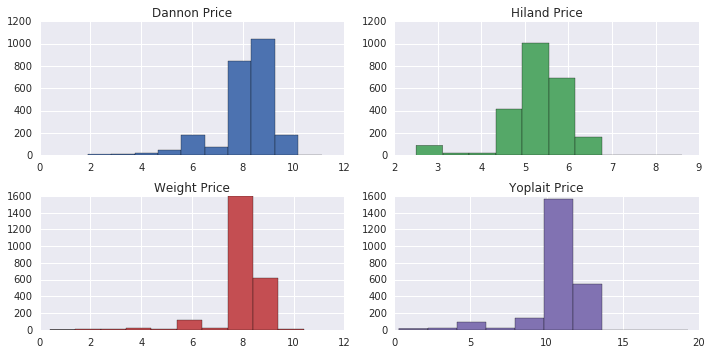

In [14]:
colors = sns.color_palette()
f, ax = plt.subplots(2,2,figsize=(10, 5))
ax[0,0].hist(Yogurt["price.dannon"],color=colors[0])
ax[0,0].set_title("Dannon Price")
ax[0,1].hist(Yogurt["price.hiland"],color=colors[1])
ax[0,1].set_title("Hiland Price")
ax[1,0].hist(Yogurt["price.weight"],color=colors[2])
ax[1,0].set_title("Weight Price")
ax[1,1].hist(Yogurt["price.yoplait"],color=colors[3])
ax[1,1].set_title("Yoplait Price")
f.tight_layout()
plt.show()

### Description of data set

The CSV file does not come with a description, but everything seems pretty self explanitory. Hopefully the following is correct......

- id identifies a customer
- feat.brand tells you if the brand of yougurt is being featured or not
- price.brand tells you the current price of the yogurt
- choice tells you what was purchased.

there are a lot of questions to ask here: 

- do some brands sell more than others?
- brand loyalty. Do specific customers prefer a specific brand? Can price or feature make them change there mind?
- if a brand is being featured, do more people buy it?
- if a brand is cheap/expensive, do more people buy it?
- how do featuring and price interact?

### Do some brands sell more than others?

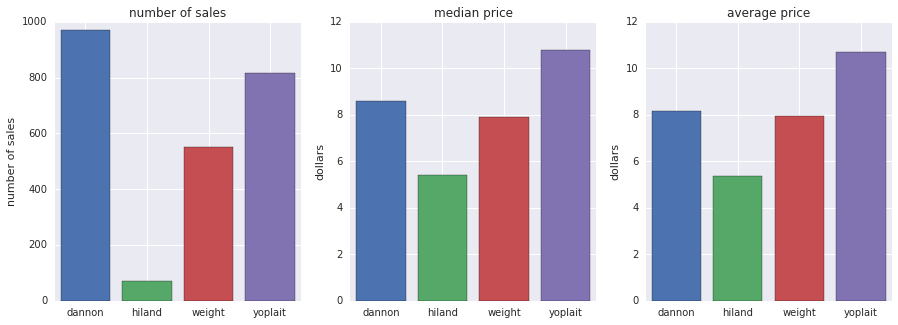

In [15]:
x = np.transpose(np.stack(np.unique(Yogurt["choice"],return_counts=True)))

brands = x[:,0].tolist()
num_purchases = x[:,1].tolist()

median_price = np.array([Yogurt["price.dannon"].median(),
                         Yogurt["price.hiland"].median(),
                         Yogurt["price.weight"].median(),
                         Yogurt["price.yoplait"].median()])

average_price = np.array([Yogurt["price.dannon"].mean(),
                          Yogurt["price.hiland"].mean(),
                          Yogurt["price.weight"].mean(),
                          Yogurt["price.yoplait"].mean()])

xticks = [0,1,2,3]

colors = sns.color_palette()

f, ax = plt.subplots(1,3,figsize=(15, 5))
ax[0].bar(xticks,num_purchases,align='center',color=colors)
ax[0].set_xticks(xticks)
ax[0].set_xticklabels(brands)
ax[0].set_ylabel("number of sales")
ax[0].set_title("number of sales")
ax[1].bar(xticks,median_price,align='center',color=colors)
ax[1].set_title("median price")
ax[1].set_ylabel("dollars")
ax[1].set_xticks(xticks)
ax[1].set_xticklabels(brands)
ax[2].bar(xticks,average_price,align='center',color=colors)
ax[2].set_title("average price")
ax[2].set_ylabel("dollars")
ax[2].set_xticks(xticks)
ax[2].set_xticklabels(brands)
plt.show()

The most popular yogurt is Dannon. The least popular (and least expensive) is Hiland.

### Do customers prefer a specific brand?

In [69]:
def customer(n): return Yogurt[Yogurt["id"] == n]
def number_of_purchases(n,yogurt): return (customer(n)["choice"] == yogurt).sum()
def customer_purchase_bar(n): return [number_of_purchases(n,yogurt) for yogurt in brands]
def customer_to_grid(n): return [(i,j) for i in range(10) for j in range(10)][n]

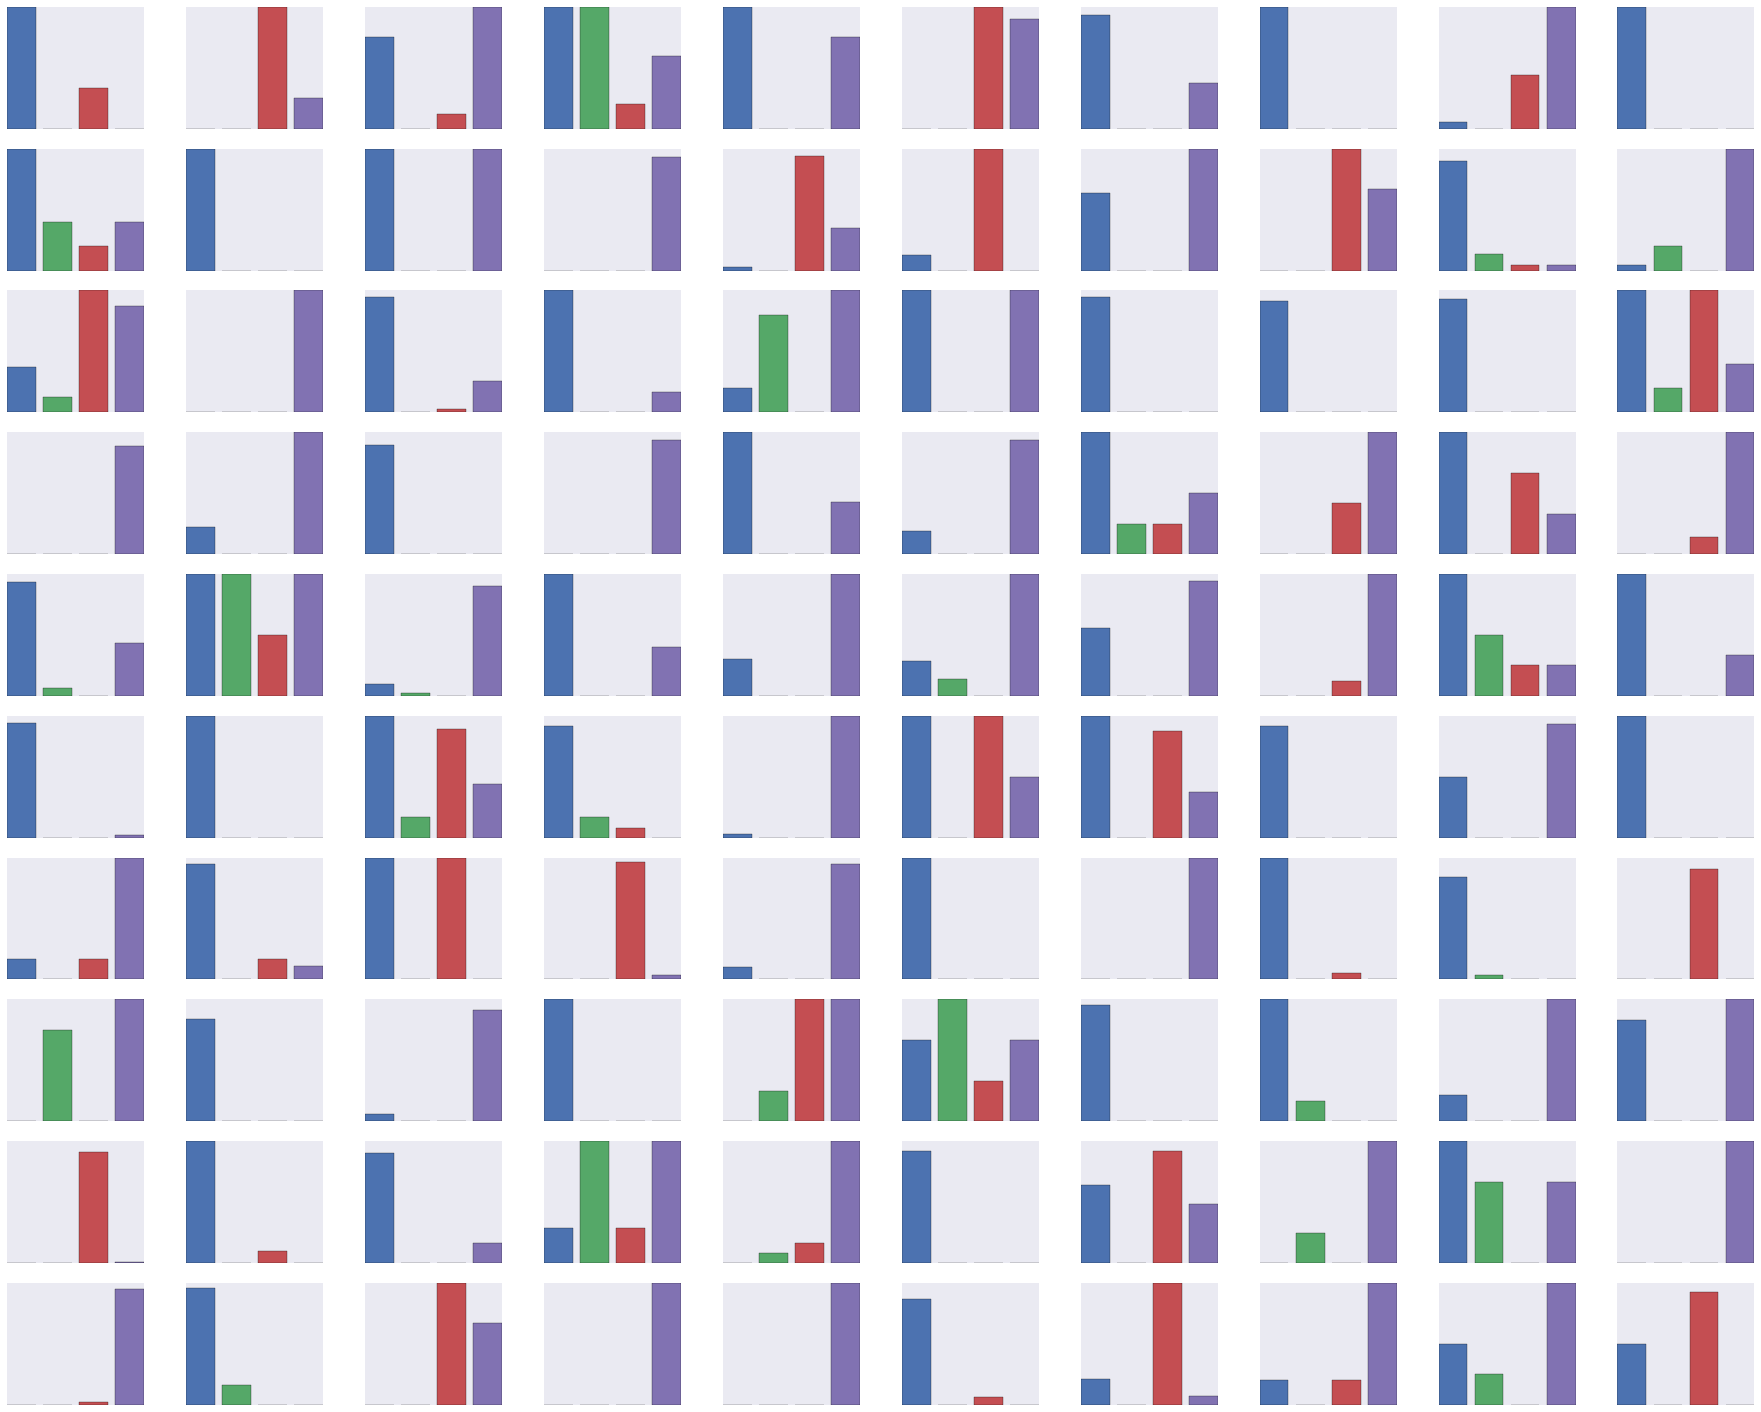

In [100]:
f, ax = plt.subplots(10,10,figsize=(25, 20),sharex=True)
f.tight_layout()
for n in range(100):
    i = customer_to_grid(n)[0]
    j = customer_to_grid(n)[1]
    ax[i,j].bar(xticks,customer_purchase_bar(n+1),align='center',color=colors)
    ax[i,j].set_xticks([])
    ax[i,j].set_yticks([])
plt.show()

The barplots in this diagram are normalized. This is necessary because some customers purchase a lot more yogurt than others. The colors are as before: 

- blue = dannon
- green = hiland
- red = weight
- purple = yoplait